In [2]:
import math
import matplotlib.pyplot as plt

In [3]:
def make_graph(n,p,k,x,my,variance,std,flip):
    
    range_ = []
    data = []
    custom_color = []
    if flip:
        sum = 1-accu_bino(n,p,k-1,x,False)
    else:
        sum = accu_bino(n,p,k,x,False)
    length = find_length(n, p)
    # Get data
    for i in range(0, length):
        data.append(single_bino(n,p,i))
        range_.append(i)
        # Show highligthed colors
        if flip:
            if k <= i <= length:
                custom_color.append('green')
            else:
                custom_color.append('red')
        else:
            if x <= i <= k:
                custom_color.append('green')
            else:
                custom_color.append('red')
        # plotting chart
    plt.bar(range_, data, tick_label = range_,
            width = 0.7, color = custom_color)
    # Add numbers to bars
    for i in range(len(data)):
        if data[i] > 0.000009:
            plt.annotate(str(f'{data[i]:.5f}'), xy=(range_[i],data[i]), ha='center', va='bottom')
    # naming the x-axis
    if flip:
        plt.xlabel(f'P(x≥{k}): {sum:.4f} --- µ: {my:.4f} --- σ2: {variance:.4f} --- σ: {std:.4f}')
    else:
        plt.xlabel(f'P({x}≤X≤{k}): {sum:.4f} --- µ: {my:.4f} --- σ2: {variance:.4f} --- σ: {std:.4f}')
    # y-axis
    plt.ylabel(f'P(X=k)')
    # title
    plt.title('Binomial distribution!')
    # show the plot
    plt.show()

In [4]:
def find_length(n, p):
    steps = 0
    answer = 0
    while answer <= 0.99999:
        answer += (math.factorial(n) / (math.factorial(n-steps) * math.factorial(steps))) * math.pow(p,steps) * math.pow(1-p, n-steps)
        steps += 1
    return steps

In [5]:
def single_bino(n, p, k):
    answer = (math.factorial(n) / (math.factorial(n-k) * math.factorial(k))) * math.pow(p,k) * math.pow(1-p, n-k)
    return answer

In [6]:
def flip_accu_bino(n, p, k, x, steps):
    answer = 0
    for x in range (x ,k+1):
        new_answer = (math.factorial(n) / (math.factorial(n-x) * math.factorial(x))) * math.pow(p,x) * math.pow(1-p, n-x)
        if steps:
            print(f'Probability of X = {x}: {new_answer:.5f}')
        answer += new_answer
    return answer

In [7]:
def accu_bino(n, p, k, x, steps):
    answer = 0
    for x in range (x ,k+1):
        new_answer = (math.factorial(n) / (math.factorial(n-x) * math.factorial(x))) * math.pow(p,x) * math.pow(1-p, n-x)
        if steps:
            print(f'Probability of X = {x}: {new_answer:.5f}')
        answer += new_answer
    return answer

---------------BINOMIAL---------------
Expected value (µ): 19.87600 --- Variance (σ2): 0.12323 --- Standard deviation (σ): 0.35104
Probability of X = 0: 7.0442342554696e-45
Probability of X where 0 ≤ X ≤ 0: 7.0442342554696e-45
--------------------------------------


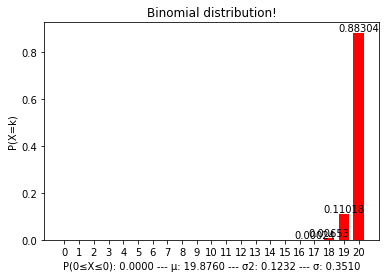

In [10]:

# N = number of trials
# P = probability of success
# X = loop while x≤k
# K = number of K for a specific outcome within N trials
# Steps = show each step of the calculation? True or False
n = 20
p = 1-0.0062
# From
x = 0
# To
k = 0

flip = False

my = n*p
variance = my * (1-p)
std = math.sqrt(variance)

print('---------------BINOMIAL---------------')
print(f'Expected value (µ): {my:.5f} --- Variance (σ2): {variance:.5f} --- Standard deviation (σ): {std:.5f}')
print(f'Probability of X = {k}: {single_bino(n,p,k)}')
if flip:
    print(f'Probability of X ≥ {k}: {1-flip_accu_bino(n,p,k-1,x,False)}')
else:
    print(f'Probability of X where {x} ≤ X ≤ {k}: {accu_bino(n,p,k,x,False)}')
print('--------------------------------------')
make_graph(n,p,k,x,my,variance,std,flip)